# Revenue Analysis by Country and City:

- Objective: Identify which countries and cities generate the highest revenue.
- Approach: Aggregate the revenue by country and city, handling different currencies and undefined values.

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [153]:
df = pd.read_csv('conversions.csv')

In [154]:
df.columns.tolist()

['actionId',
 'afprice',
 'browser',
 'city',
 'country',
 'currency',
 'date',
 'device',
 'goal',
 'goalValue',
 'ip',
 'offer_title',
 'os',
 'revenue',
 'status',
 'sub1']

In [155]:
select_cols = df[['city', 'country', 'date', 'revenue', 'currency']]
select_cols

,city,country,date,revenue,currency
0,Heidenau,DE,8/22/2024 3:01,0.0009,USD
1,Singapore,SG,8/21/2024 13:35,0.3125,SGD
2,Singapore,SG,8/21/2024 13:35,0.0596,SGD
3,Singapore,SG,8/20/2024 13:34,0.4700,SGD
4,Singapore,SG,8/20/2024 13:34,0.0960,SGD
...,...,...,...,...,...
95,Heidenau,DE,8/6/2024 2:52,0.0009,USD
96,Singapore,SG,8/5/2024 14:06,0.5472,SGD
97,Singapore,SG,8/5/2024 14:06,0.0072,SGD
98,Singapore,SG,8/5/2024 14:06,0.2139,SGD


In [156]:
import warnings
warnings.filterwarnings('ignore')
# select_cols[['revenue_amount', 'revenue_currency']] = select_cols['revenue'].str.split(' ', expand=True)
select_cols['date'] = pd.to_datetime(select_cols['date'], errors = 'coerce').dt.date
# select_cols_drop = select_cols.drop(columns=['revenue', 'revenue_currency'])
select_cols.head()

,city,country,date,revenue,currency
0,Heidenau,DE,2024-08-22,0.0009,USD
1,Singapore,SG,2024-08-21,0.3125,SGD
2,Singapore,SG,2024-08-21,0.0596,SGD
3,Singapore,SG,2024-08-20,0.4700,SGD
4,Singapore,SG,2024-08-20,0.0960,SGD


In [157]:
select_cols.isna().sum()

city        0
country     0
date        0
revenue     0
currency    0
dtype: int64

In [158]:
select_cols['currency'].value_counts().reset_index(name='count')

,index,count
0,SGD,67
1,USD,33


In [159]:
# Ensure that revenue_amount is converted to a numeric type
USD_select_cols = select_cols[select_cols['currency'] == "USD"].copy()

# Convert revenue_amount to numeric, ensuring that any non-numeric values are handled
USD_select_cols['revenue'] = pd.to_numeric(USD_select_cols['revenue'], errors='coerce')

# Now perform the multiplication
USD_select_cols['revenue'] = USD_select_cols['revenue'] * 83.94
USD_select_cols['currency'] = USD_select_cols['currency'].replace("USD", "INR")

# Display the updated DataFrame
USD_select_cols.head()


,city,country,date,revenue,currency
0,Heidenau,DE,2024-08-22,0.075546,INR
9,Heidenau,DE,2024-08-20,0.075546,INR
11,Aurora,US,2024-08-19,31.720926,INR
12,Molln,DE,2024-08-19,9.006762,INR
13,Lubon,PL,2024-08-18,1.301070,INR


In [160]:
SGD_select_cols = select_cols[select_cols['currency'] == "SGD"]
SGD_select_cols.dtypes


city         object
country      object
date         object
revenue     float64
currency     object
dtype: object

In [161]:
SGD_select_cols['revenue'] = SGD_select_cols['revenue'] * 63.67
SGD_select_cols['currency'] = SGD_select_cols['currency'].replace("SGD", 'INR')
SGD_select_cols.head()

,city,country,date,revenue,currency
1,Singapore,SG,2024-08-21,19.896875,INR
2,Singapore,SG,2024-08-21,3.794732,INR
3,Singapore,SG,2024-08-20,29.924900,INR
4,Singapore,SG,2024-08-20,6.112320,INR
5,Singapore,SG,2024-08-20,21.017467,INR


In [162]:
Concate = pd.concat([USD_select_cols, SGD_select_cols], ignore_index=True)

In [163]:
Concate.groupby(['city', 'country']).agg(Total_Payout_By_City = ("revenue", "sum"),
                                                  Total_Payout_By_Country = ("revenue", "sum")).reset_index().sort_values(by = "Total_Payout_By_Country")

,city,country,Total_Payout_By_City,Total_Payout_By_Country
6,Parana,AR,0.000000,0.000000
2,Heidenau,DE,1.133190,1.133190
3,Lubon,PL,6.345864,6.345864
4,Molln,DE,9.006762,9.006762
5,Monrovia,US,26.491464,26.491464
0,Aurora,US,31.720926,31.720926
7,Port Clyde,US,114.351462,114.351462
8,Singapore,SG,1028.098591,1028.098591
1,Garden Grove,US,31057.800000,31057.800000


In [164]:
select_cols.head()

,city,country,date,revenue,currency
0,Heidenau,DE,2024-08-22,0.0009,USD
1,Singapore,SG,2024-08-21,0.3125,SGD
2,Singapore,SG,2024-08-21,0.0596,SGD
3,Singapore,SG,2024-08-20,0.4700,SGD
4,Singapore,SG,2024-08-20,0.0960,SGD


In [165]:
Select_USD = select_cols[select_cols.currency == "USD"]
Select_USD.head()

,city,country,date,revenue,currency
0,Heidenau,DE,2024-08-22,0.0009,USD
9,Heidenau,DE,2024-08-20,0.0009,USD
11,Aurora,US,2024-08-19,0.3779,USD
12,Molln,DE,2024-08-19,0.1073,USD
13,Lubon,PL,2024-08-18,0.0155,USD


In [166]:
Select_SGD = select_cols[select_cols.currency == "SGD"]
Select_SGD.head()

,city,country,date,revenue,currency
1,Singapore,SG,2024-08-21,0.3125,SGD
2,Singapore,SG,2024-08-21,0.0596,SGD
3,Singapore,SG,2024-08-20,0.4700,SGD
4,Singapore,SG,2024-08-20,0.0960,SGD
5,Singapore,SG,2024-08-20,0.3301,SGD


In [167]:
Select_USD.groupby(['city', 'country', 'currency']).agg(Total_Payout_By_City = ("revenue", "sum"),
                                                  Total_Payout_By_Country = ("revenue", "sum")).reset_index().sort_values(by = "Total_Payout_By_Country")

,city,country,currency,Total_Payout_By_City,Total_Payout_By_Country
6,Parana,AR,USD,0.0000,0.0000
2,Heidenau,DE,USD,0.0135,0.0135
3,Lubon,PL,USD,0.0756,0.0756
4,Molln,DE,USD,0.1073,0.1073
5,Monrovia,US,USD,0.3156,0.3156
0,Aurora,US,USD,0.3779,0.3779
7,Port Clyde,US,USD,1.3623,1.3623
1,Garden Grove,US,USD,370.0000,370.0000


In [170]:
Select_SGD.groupby(['city', 'country', 'currency']).agg(Total_Payout_By_City = ("revenue", "sum"),
                                                  Total_Payout_By_Country = ("revenue", "sum")).reset_index().sort_values(by = "Total_Payout_By_Country")

,city,country,currency,Total_Payout_By_City,Total_Payout_By_Country
0,Singapore,SG,SGD,16.1473,16.1473


# Revenue Analysis by Country and City:


In [177]:
Ans_payout = select_cols.groupby(['city', 'country', 'currency']).agg(Total_Payout_By_City = ("revenue", "sum"),
                                                  Total_Payout_By_Country = ("revenue", "sum")).reset_index().sort_values(by = "Total_Payout_By_Country")
Ans_payout

,city,country,currency,Total_Payout_By_City,Total_Payout_By_Country
6,Parana,AR,USD,0.0000,0.0000
2,Heidenau,DE,USD,0.0135,0.0135
3,Lubon,PL,USD,0.0756,0.0756
4,Molln,DE,USD,0.1073,0.1073
5,Monrovia,US,USD,0.3156,0.3156
0,Aurora,US,USD,0.3779,0.3779
7,Port Clyde,US,USD,1.3623,1.3623
8,Singapore,SG,SGD,16.1473,16.1473
1,Garden Grove,US,USD,370.0000,370.0000


In [178]:
df_1 = Ans_payout[['city', 'Total_Payout_By_Country']]
df_1

,city,Total_Payout_By_Country
6,Parana,0.0000
2,Heidenau,0.0135
3,Lubon,0.0756
4,Molln,0.1073
5,Monrovia,0.3156
0,Aurora,0.3779
7,Port Clyde,1.3623
8,Singapore,16.1473
1,Garden Grove,370.0000


# Data Visualization City wise

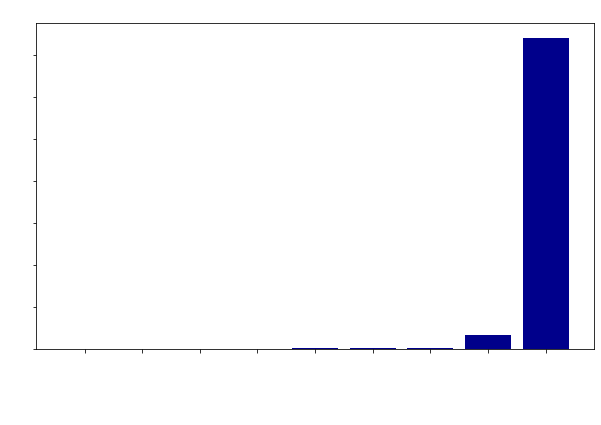

In [185]:
plt.figure(figsize=(10, 6))
plt.bar(df_1['city'], df_1['Total_Payout_By_Country'], color='darkblue')
plt.title('Total Payout by City', color = 'white', weight = 'bold')
plt.xticks(rotation=45, color = 'white', weight = 'bold')
plt.yticks(rotation=45, color = 'white', weight = 'bold')
plt.show()

# Country wise

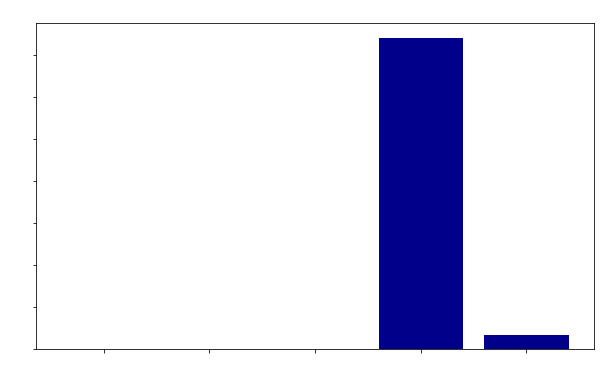

In [186]:
plt.figure(figsize=(10, 6))
plt.bar(Ans_payout['country'], Ans_payout['Total_Payout_By_Country'], color='darkblue')
plt.title('Total Payout by City', color = 'white', weight = 'bold')
plt.xticks(rotation=45, color = 'white', weight = 'bold')
plt.yticks(rotation=45, color = 'white', weight = 'bold')
plt.show()

# Currency vs Total_Payout_By_Country

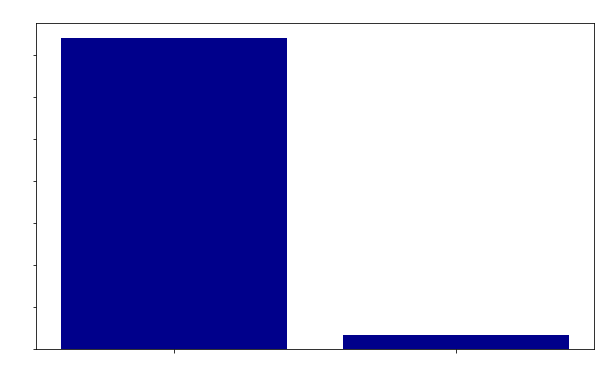

In [187]:
plt.figure(figsize=(10, 6))
plt.bar(Ans_payout['currency'], Ans_payout['Total_Payout_By_Country'], color='darkblue')
plt.title('Total Payout by City', color = 'white', weight = 'bold')
plt.xticks(rotation=45, color = 'white', weight = 'bold')
plt.yticks(rotation=45, color = 'white', weight = 'bold')
plt.show()